In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.lines import Line2D


In [13]:
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 28
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.linewidth'] = 1

In [3]:
def log_phi(log_M, t, a, b, c, d):
    '''
    Star Formation Main Sequence (Speagle+2014)
    M in Msun
    phi in M_sun/yr
    '''
    return (a - b*t)*log_M - (c - d*t)

In [4]:
import numpy as np
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
cos = FlatLambdaCDM(70 * u.km / u.s / u.Mpc, Om0 = 0.3,)
z = 0.924
t = cos.age(z).to(u.Gyr).value

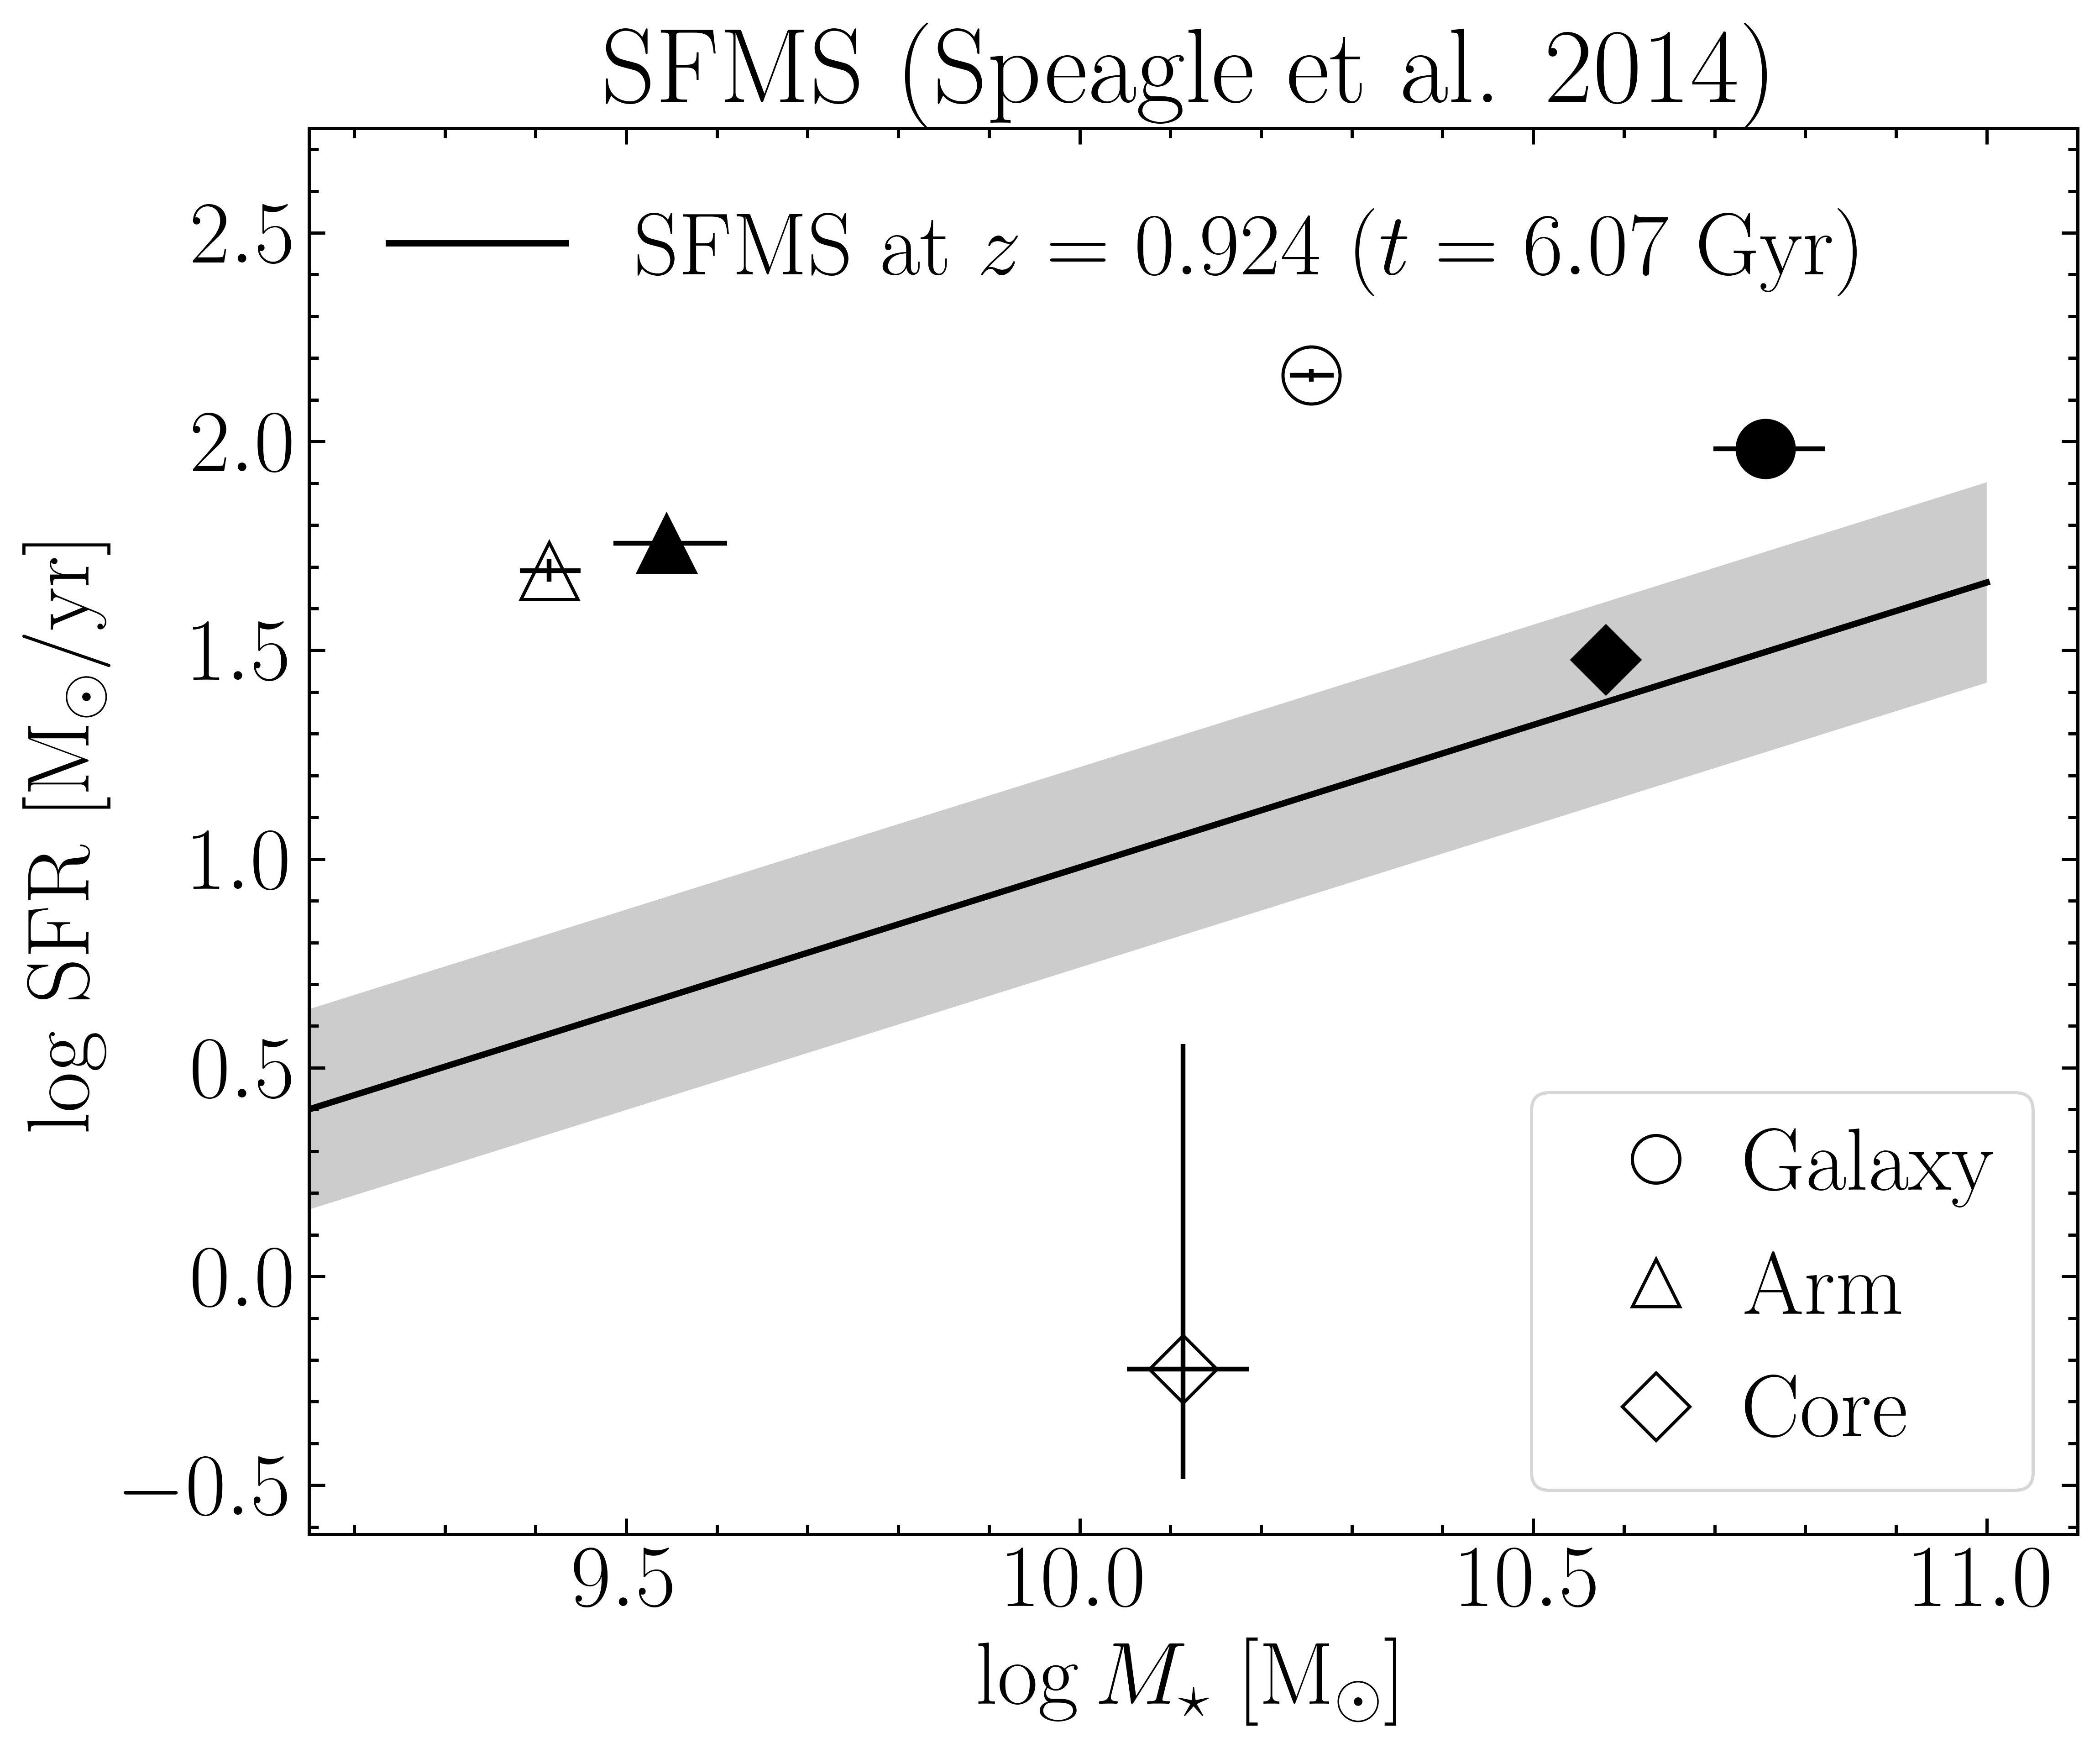

In [15]:
# Speagle+2014
log_M1 = np.linspace(9, 11, 100)
#params
a1 = 0.84
b1 = 0.026
c1 = 6.51
d1 = 0.11
sigma = 0.24 #scatter
log_phi1 = log_phi(log_M1, t, a1, b1, c1, d1)
#plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(log_M1, log_phi1, color='black', lw=2, label=r'$z=0.924(t=%.2f~\rm{Gyr})$'%t)
ax.fill_between(log_M1, log_phi1-sigma, log_phi1+sigma, color='black', alpha=0.2, edgecolor='none')
ax.set_xlabel(r'$\log M_{\star}$ [M$_{\odot}$]')
ax.set_ylabel(r'$\log$ SFR [M$_{\odot}$/yr]')
#note our galaxy
ax.errorbar(np.log10(5.7e+10), np.log10(96), xerr=[[np.log10(5.7e+10+0.8e+10)-np.log10(5.7e+10)], [np.log10(5.7e+10)-np.log10(5.7e+10-0.8e+10)]], yerr=[[np.log10(96+8)-np.log10(96)], [np.log10(96)-np.log10(96-8)]], fmt='o', ecolor='k', markeredgecolor='k', markerfacecolor='k', label='logM(Galaxy)', markersize=18)
#1.8\pm 0.1 e+10 & 144 \pm 5
ax.errorbar(np.log10(1.8e+10), np.log10(144), xerr=[[np.log10(1.8e+10+0.1e+10)-np.log10(1.8e+10)], [np.log10(1.8e+10)-np.log10(1.8e+10-0.1e+10)]], yerr=[[np.log10(144+5)-np.log10(144)], [np.log10(144)-np.log10(144-5)]], fmt='o', ecolor='k', markeredgecolor='k', markerfacecolor='none', color='green', label='delayed-tau(Galaxy)', markersize=18)
#note our arm: 3.5\pm0.5 e+9 & 57 \pm 3
ax.errorbar(np.log10(3.5e+9), np.log10(57), xerr=[[np.log10(3.5e+9+0.5e+9)-np.log10(3.5e+9)], [np.log10(3.5e+9)-np.log10(3.5e+9-0.5e+9)]], yerr=[[np.log10(57+3)-np.log10(57)], [np.log10(57)-np.log10(57-3)]], fmt='^', ecolor='k', markeredgecolor='k', markerfacecolor='k', label='logM(Arm)', markersize=18)
#2.6\pm0.2 e+9 & 49 \pm 3
ax.errorbar(np.log10(2.6e+9), np.log10(49), xerr=[[np.log10(2.6e+9+0.2e+9)-np.log10(2.6e+9)], [np.log10(2.6e+9)-np.log10(2.6e+9-0.2e+9)]], yerr=[[np.log10(49+3)-np.log10(49)], [np.log10(49)-np.log10(49-3)]], fmt='^', ecolor='k', markeredgecolor='k', markerfacecolor='none', label='delayed-tau(Arm)', markersize=18)
#note our core: 1.3\pm0.2 e+10 & 0.6\pm0.5
ax.errorbar(np.log10(1.3e+10), np.log10(0.6), xerr=[[np.log10(1.3e+10+0.2e+10)-np.log10(1.3e+10)], [np.log10(1.3e+10)-np.log10(1.3e+10-0.2e+10)]], yerr=[[np.log10(0.6+0.5)-np.log10(0.6)], [np.log10(0.6)-np.log10(0.6-0.5)]], fmt='D', ecolor='k', markeredgecolor='k', markerfacecolor='none', label='logM(Core)', markersize=15)
#3.8\pm0.3 e+10 & 30\pm3
ax.errorbar(np.log10(3.8e+10), np.log10(30), xerr=[[np.log10(3.8e+10+0.3e+10)-np.log10(3.8e+10)], [np.log10(3.8e+10)-np.log10(3.8e+10-0.3e+10)]], yerr=[[np.log10(30+3)-np.log10(30)], [np.log10(30)-np.log10(30-3)]], fmt='D', ecolor='k', markeredgecolor='k', markerfacecolor='k', label='delayed-tau(Core)', markersize=15)
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, 2.75)
ax.set_xlim(9.15, 11.1)
#set labels
gal = Line2D([0], [0], linestyle='none', marker='o', markeredgecolor='k', markerfacecolor='none', label='Galaxy', markersize=15)
arm = Line2D([0], [0], linestyle='none', marker='^', markeredgecolor='k', markerfacecolor='none', label='Arm', markersize=15)
core = Line2D([0], [0], linestyle='none', marker='D', markeredgecolor='k', markerfacecolor='none', label='Core', markersize=15)
SFMS = Line2D([0], [0], color='black', lw=2)
legend1 = plt.legend(handles=[gal, arm, core], labels=['Galaxy', 'Arm', 'Core'], handletextpad=0, loc='lower right')
legend2 = plt.legend(handles=[SFMS], labels=[r'SFMS at $z=0.924~(t=%.2f~\rm{Gyr})$'%t], loc='upper left', edgecolor='none')
ax.add_artist(legend1)
ax.add_artist(legend2)
ax.set_title('SFMS (Speagle et al. 2014)')
plt.savefig('SFMS.pdf', bbox_inches='tight')
plt.show()

In [32]:
cos.angular_diameter_distance_z1z2(4.9012, 4.8756)

<Quantity -2.37075948 Mpc>

In [33]:
cos.angular_diameter_distance_z1z2(0.9251, 0.9245)

<Quantity -0.79240636 Mpc>

In [36]:
#scale luminosity to higher z
9.24e41/cos.luminosity_distance(0.9245)**2 * cos.luminosity_distance(4.9)**2

<Quantity 5.33284883e+43>

In [37]:
5.3328488e43/6.16

8.657222077922078e+42